In [1]:
from simulations import simulation1, simulation2
from shapley_values.causal_shap import Explainer, ShapleyValuesType
from shapley_values.utils import get_baseline
import numpy as np
from xgboost import XGBRegressor
import shap

np.random.seed(0)

X, y = simulation1(num_samples=10000)

model = XGBRegressor()
model.fit(X, y)

feature_names = ["P", "F"]

sample = np.array([1.06, 2.43])

explainer = Explainer(X = X, model = model, is_classification=False, rounding_precision = 2)
phis = explainer.compute_shapley_values(sample, type = ShapleyValuesType.MARGINAL)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Baseline Value (E[f(X)]):  0.941795
Predicted Value (f(x))  [1.2298367]
Shapley Values + (E[f(X)]):  1.23


In [2]:
explanation = shap.Explanation(values=np.array(phis),
                                feature_names=feature_names,
                                base_values=get_baseline(X, model),
                                output_names=['Prediction'])

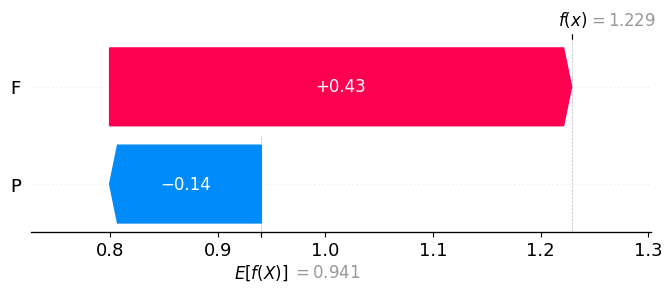

In [3]:
shap.plots.waterfall(explanation)

In [4]:
X, y = simulation2(num_samples=10000)

model = XGBRegressor()
model.fit(X, y)

feature_names = ["P", "F"]

sample = np.array([4, 3.8])

explainer = Explainer(X = X, model = model, is_classification=False, rounding_precision = 1)
phis = explainer.compute_shapley_values(sample, type = ShapleyValuesType.MARGINAL)

Baseline Value (E[f(X)]):  0.9801547
Predicted Value (f(x))  [3.711208]
Shapley Values + (E[f(X)]):  3.711


In [5]:
explanation = shap.Explanation(values=np.array(phis),
                                feature_names=feature_names,
                                base_values=get_baseline(X, model),
                                output_names=['Prediction'])

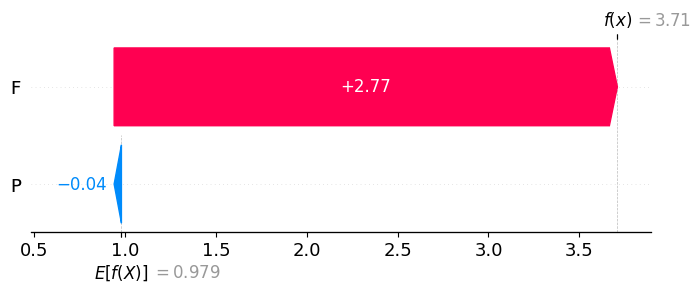

In [6]:
shap.plots.waterfall(explanation)